# Covid19 Data Analysis

### 1.Confirmed Cases

In [148]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py 
import plotly.graph_objs as go 
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

In [149]:
#importing dataset
df = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\time_series_covid_19_confirmed.csv")
test = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\covid_19_data.csv")
util = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')


In [150]:
#worldwide plotting for confirmed cases
plotting = test.copy()
plotting['Count'] = test['Confirmed'].groupby(test['Country/Region']).transform('count')
plotting['CODE']= util['CODE']

In [151]:
data = dict(
        type = 'choropleth',
        locations = plotting['CODE'],
        z = plotting['Count'],
        colorbar = {'title' : 'Covid-19 confirmed cases - World Wide'},
      )
layout = dict(
    title = 'Confirmed Cases',
    geo = dict(
            showframe = False,
            projection = {'type':'natural earth'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [152]:
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/1/20  6/2/20  6/3/20  6/4/20  6/5/20  \
0        0        0        0  ...   15750   16509   17267   18054   18969   
1        0        0        0  ...    1143    1164    1184    1197    1212   
2        0        0        0  ...    9513    9626    9733    9831    9935   
3        0        0        0  ...     765     844     851     852     852   
4        0        0        0  ...      86      86      86      86      86   

   6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  
0   19551   20342   20917   21459    22142  
1    1232    1246    1263    1299     1341  
2   10050   10154   10265   10382    10484  
3     852     852     852     852      852  
4      88      91      92      96      113  

[5 rows x 145 columns]

In [153]:
#delete useless columns
df.drop(['Lat','Long'],axis=1,inplace=True)

In [154]:
#Aggregating the rows by the country
df_aggregated = df.groupby("Country/Region").sum()

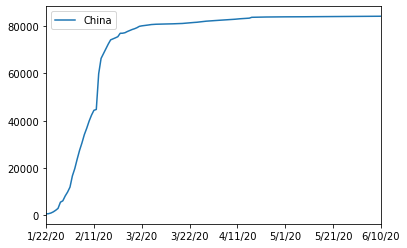

In [155]:
#visualizing data related to a country for example India(mm-dd-yy)
df_aggregated.loc['China'].plot()
plt.legend()

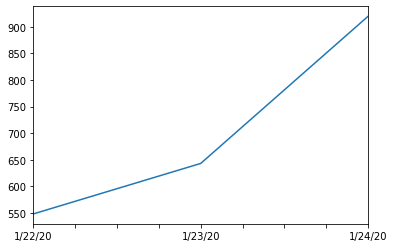

In [156]:
#calculating the first derivative of curve
df_aggregated.loc['China'][:3].plot()

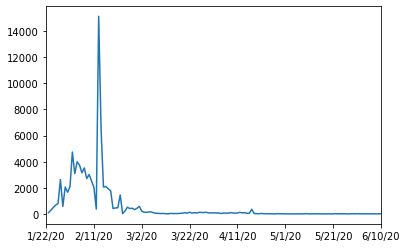

In [157]:
#maximum infection rate
df_aggregated.loc['China'].diff().plot()

In [158]:
df_aggregated.loc["China"].diff().max()

15136.0

In [159]:
#maximum infection rate for every country
countries = list(df_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(df_aggregated.loc[c].diff().max())
df_aggregated["max_infection_rate"] = max_infection_rates

In [160]:
#creating dataframe of only needed column
corona_data = pd.DataFrame(df_aggregated["max_infection_rate"])

In [161]:
corona_data.head()

max_infection_rate
Country/Region                    
Afghanistan                  915.0
Albania                       42.0
Algeria                      199.0
Andorra                       79.0
Angola                        17.0

In [162]:
#importing happiness report
happiness_df = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\worldwide_happiness_report.csv")

In [163]:
happiness_df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [164]:
#dropping useless columns
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [165]:
happiness_df.drop(useless_cols,axis=1,inplace=True)

In [166]:
#change index for further joining
happiness_df.set_index("Country or region",inplace=True)

In [167]:
#Applying inner join 
data = corona_data.join(happiness_df,how="inner")

In [168]:
#correlation matrix
data.corr()

max_infection_rate  GDP per capita  \
max_infection_rate                      1.000000        0.207728   
GDP per capita                          0.207728        1.000000   
Social support                          0.156295        0.757521   
Healthy life expectancy                 0.216649        0.859431   
Freedom to make life choices            0.072506        0.394799   

                              Social support  Healthy life expectancy  \
max_infection_rate                  0.156295                 0.216649   
GDP per capita                      0.757521                 0.859431   
Social support                      1.000000                 0.751632   
Healthy life expectancy             0.751632                 1.000000   
Freedom to make life choices        0.456317                 0.423146   

                              Freedom to make life choices  
max_infection_rate                                0.072506  
GDP per capita                                    0.394799  
Social support                                    0.456317  
Healthy life expectancy                           0.423146  
Freedom to make life choices                      1.000000

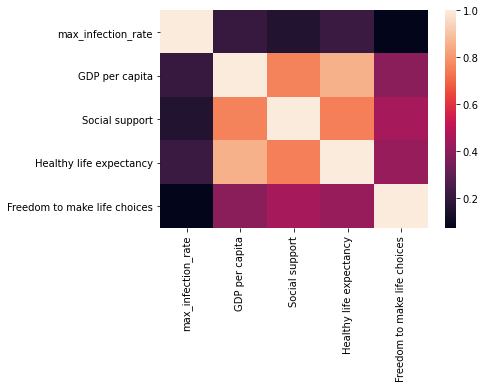

In [169]:
sns.heatmap(data.corr())

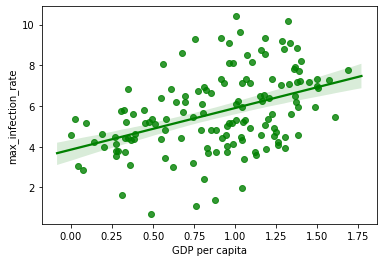

In [170]:
#how gdp got affected by infection rate
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y),color='g')

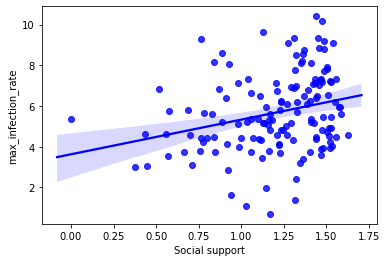

In [171]:
#how social support got affected by infection rate
x = data["Social support"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y),color='b')

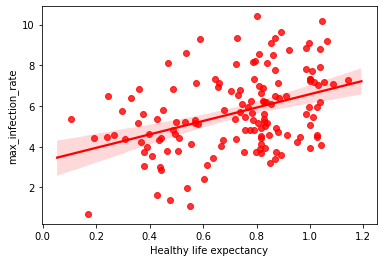

In [172]:
#how healthy life expectancy support got affected by infection rate
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y),color='r')

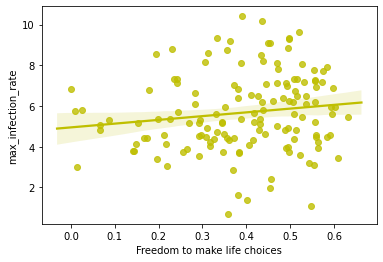

In [173]:
#how freedom to make life choices got affected by infection rate
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y),color='y')

### 2.Death Cases

In [174]:
df = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\time_series_covid_19_deaths.csv")
test = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\covid_19_data.csv")
util = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [175]:
plotting = test.copy()
plotting['Count'] = test['Deaths'].groupby(test['Country/Region']).transform('count')
plotting['CODE']= util['CODE']

In [176]:
data = dict(
        type = 'choropleth',
        locations = plotting['CODE'],
        z = plotting['Count'],
        colorbar = {'title' : 'Covid-19 deaths cases - World Wide'},
      )
layout = dict(
    title = 'Deaths Cases',
    geo = dict(
            showframe = False,
            projection = {'type':'natural earth'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [177]:
#delete useless columns
df.drop(['Lat','Long'],axis=1,inplace=True)

In [178]:
#Aggregating the rows by the country
df_aggregated = df.groupby("Country/Region").sum()

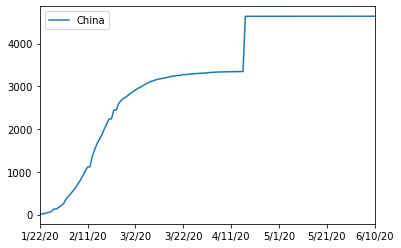

In [179]:
#visualizing data related to a country for example India(mm-dd-yy)
df_aggregated.loc['China'].plot()
plt.legend()

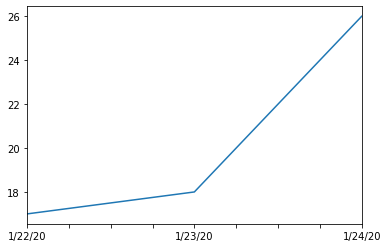

In [180]:
#calculating the first derivative of curve
df_aggregated.loc['China'][:3].plot()

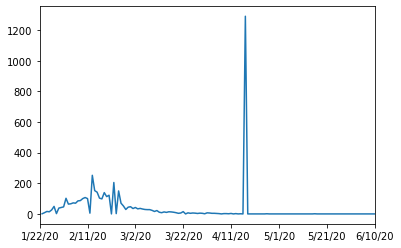

In [181]:
#maximum death rate
df_aggregated.loc['China'].diff().plot()

In [182]:
df_aggregated.loc["China"].diff().max()

1290.0

In [183]:
#maximum infection rate for every country
countries = list(df_aggregated.index)
max_deaths_rate = []
for c in countries:
    max_deaths_rate.append(df_aggregated.loc[c].diff().max())
df_aggregated["max_deaths_rate"] = max_deaths_rate

In [184]:
#creating dataframe of only needed column
corona_data = pd.DataFrame(df_aggregated["max_deaths_rate"])

In [185]:
#importing happiness report
happiness_df = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\worldwide_happiness_report.csv")

In [186]:
#dropping useless columns
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [187]:
happiness_df.drop(useless_cols,axis=1,inplace=True)

In [188]:
#change index for further joining
happiness_df.set_index("Country or region",inplace=True)

In [189]:
#Applying inner join 
data = corona_data.join(happiness_df,how="inner")

In [190]:
#correlation matrix
data.corr()

max_deaths_rate  GDP per capita  Social support  \
max_deaths_rate                      1.000000        0.244057        0.202069   
GDP per capita                       0.244057        1.000000        0.757521   
Social support                       0.202069        0.757521        1.000000   
Healthy life expectancy              0.287943        0.859431        0.751632   
Freedom to make life choices         0.076019        0.394799        0.456317   

                              Healthy life expectancy  \
max_deaths_rate                              0.287943   
GDP per capita                               0.859431   
Social support                               0.751632   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.423146   

                              Freedom to make life choices  
max_deaths_rate                                   0.076019  
GDP per capita                                    0.394799  
Social support                                    0.456317  
Healthy life expectancy                           0.423146  
Freedom to make life choices                      1.000000

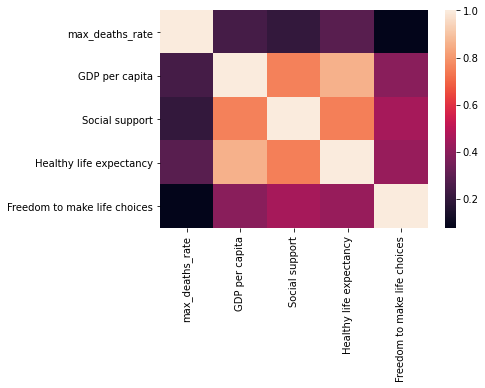

In [191]:
sns.heatmap(data.corr())

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



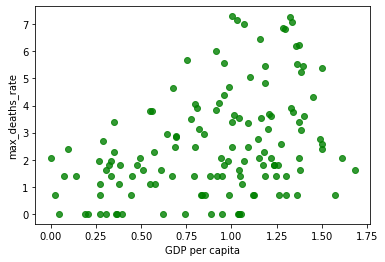

In [192]:
#how gdp got affected by death rate
x = data["GDP per capita"]
y = data["max_deaths_rate"]
sns.regplot(x,np.log(y),color='g')

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



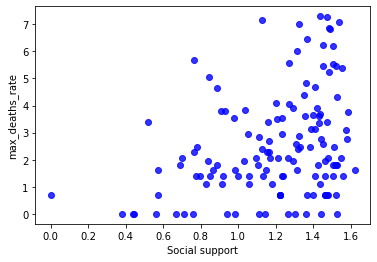

In [193]:
#how social support got affected by infection rate
x = data["Social support"]
y = data["max_deaths_rate"]
sns.regplot(x,np.log(y),color='b')

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



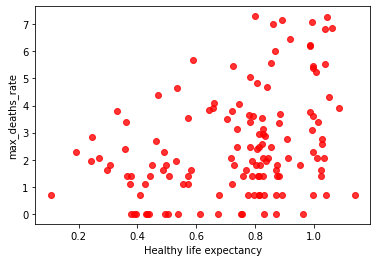

In [194]:
#how healthy life expectancy support got affected by infection rate
x = data["Healthy life expectancy"]
y = data["max_deaths_rate"]
sns.regplot(x,np.log(y),color='r')

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



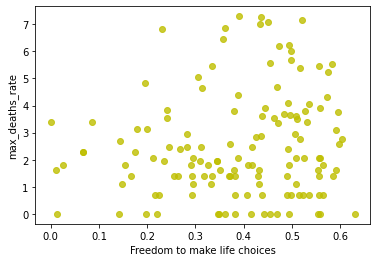

In [195]:
#how freedom to make life choices got affected by infection rate
x = data["Freedom to make life choices"]
y = data["max_deaths_rate"]
sns.regplot(x,np.log(y),color='y')

### 3.Recovered Cases

In [196]:
#importing dataset
df = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\time_series_covid_19_recovered.csv")
test = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\covid_19_data.csv")
util = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')


In [197]:
#worldwide plotting for confirmed cases
plotting = test.copy()
plotting['Count'] = test['Recovered'].groupby(test['Country/Region']).transform('count')
plotting['CODE']= util['CODE']

In [198]:
data = dict(
        type = 'choropleth',
        locations = plotting['CODE'],
        z = plotting['Count'],
        colorbar = {'title' : 'Covid-19 recovered cases - World Wide'},
      )
layout = dict(
    title = 'recovered Cases',
    geo = dict(
            showframe = False,
            projection = {'type':'natural earth'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [199]:
#delete useless columns
df.drop(['Lat','Long'],axis=1,inplace=True)

In [200]:
#Aggregating the rows by the country
df_aggregated = df.groupby("Country/Region").sum()

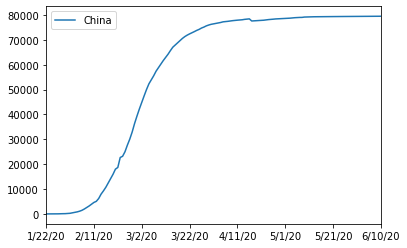

In [201]:
#visualizing data related to a country for example India(mm-dd-yy)
df_aggregated.loc['China'].plot()
plt.legend()

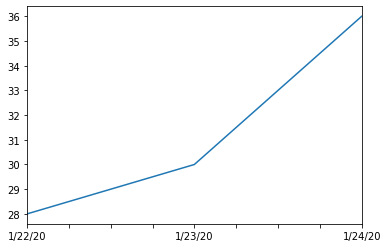

In [202]:
#calculating the first derivative of curve
df_aggregated.loc['China'][:3].plot()

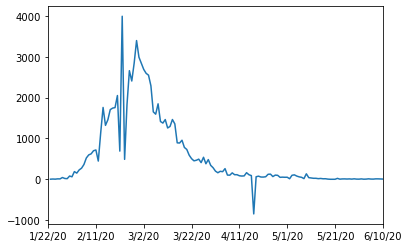

In [203]:
#maximum recover rate
df_aggregated.loc['China'].diff().plot()

In [204]:
df_aggregated.loc["China"].diff().max()

3995.0

In [205]:
#maximum recover rate for every country
countries = list(df_aggregated.index)
max_recover_rates = []
for c in countries:
    max_recover_rates.append(df_aggregated.loc[c].diff().max())
df_aggregated["max_recover_rate"] = max_recover_rates

In [206]:
#creating dataframe of only needed column
corona_data = pd.DataFrame(df_aggregated["max_recover_rate"])

In [207]:
#importing happiness report
happiness_df = pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\MlProject\dataframe\worldwide_happiness_report.csv")

In [208]:
#dropping useless columns
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [209]:
happiness_df.drop(useless_cols,axis=1,inplace=True)

In [210]:
#change index for further joining
happiness_df.set_index("Country or region",inplace=True)

In [211]:
#Applying inner join 
data = corona_data.join(happiness_df,how="inner")

In [212]:
#correlation matrix
data.corr()

max_recover_rate  GDP per capita  \
max_recover_rate                      1.000000        0.141384   
GDP per capita                        0.141384        1.000000   
Social support                        0.134353        0.757521   
Healthy life expectancy               0.137716        0.859431   
Freedom to make life choices          0.034197        0.394799   

                              Social support  Healthy life expectancy  \
max_recover_rate                    0.134353                 0.137716   
GDP per capita                      0.757521                 0.859431   
Social support                      1.000000                 0.751632   
Healthy life expectancy             0.751632                 1.000000   
Freedom to make life choices        0.456317                 0.423146   

                              Freedom to make life choices  
max_recover_rate                                  0.034197  
GDP per capita                                    0.394799  
Social support                                    0.456317  
Healthy life expectancy                           0.423146  
Freedom to make life choices                      1.000000

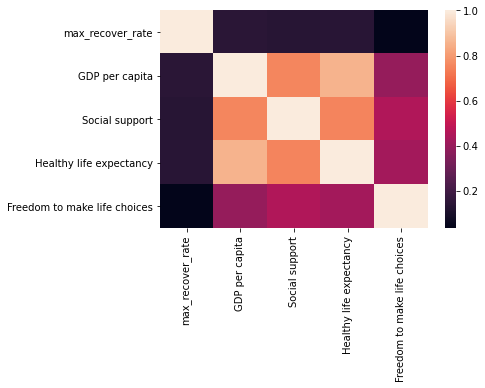

In [213]:
sns.heatmap(data.corr())

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



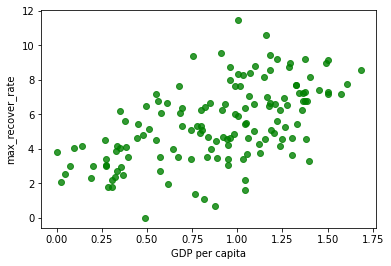

In [214]:
#how gdp got affected by infection rate
x = data["GDP per capita"]
y = data["max_recover_rate"]
sns.regplot(x,np.log(y),color='g')

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



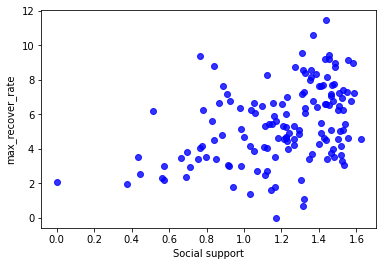

In [215]:
#how social support got affected by infection rate
x = data["Social support"]
y = data["max_recover_rate"]
sns.regplot(x,np.log(y),color='b')

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



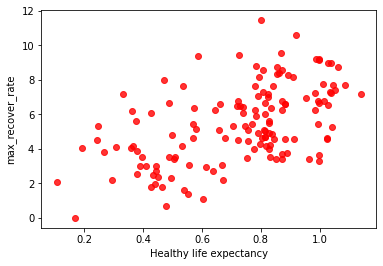

In [216]:
#how healthy life expectancy support got affected by infection rate
x = data["Healthy life expectancy"]
y = data["max_recover_rate"]
sns.regplot(x,np.log(y),color='r')

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



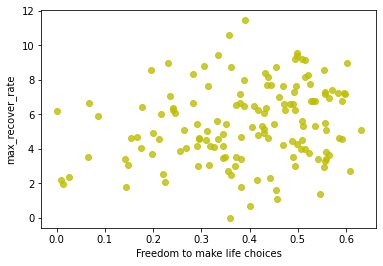

In [217]:
#how freedom to make life choices got affected by infection rate
x = data["Freedom to make life choices"]
y = data["max_recover_rate"]
sns.regplot(x,np.log(y),color='y')